In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

## Understand variables:

In [2]:
df_train = pd.read_csv('train.csv')
df_train.shape

(1460, 81)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train["SalePrice"].describe()  #desciptive statistics summary()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


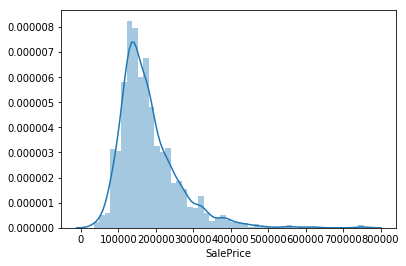

In [5]:
hist = sns.distplot(df_train["SalePrice"])  #Histogram

**Insight of Histogram:**
* not normal distribution
* right-skewed 
* show peakedness


## Univariable study:


 **Choosing features by general knowledge to analysis how they influence "SalePrice"**
 This step is to be fimilar with univariable analysis 

Numerical_features:
 * "GrLivArea": Ground living area square feet
 * "TotalBsmtSF": Total square feet of basement area

Categorical_features:
 * "OverallQual": Overall material and finish quality
 * "YearBuilt": Year to be built



**GrLivArea and SalePrice**

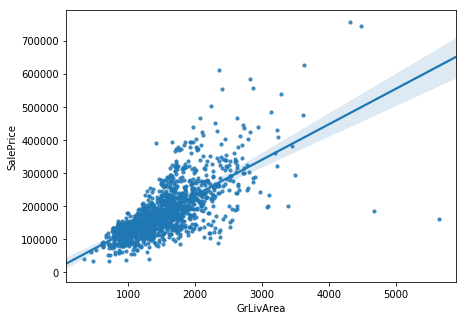

In [6]:
# Scatter plot with regression line
f, ax = plt.subplots(figsize=(7,5))
fig = sns.regplot(df_train["GrLivArea"], df_train["SalePrice"], scatter_kws={'s':10})

GrLivArea and SalePrice has a linear relationship

**TotalBsmtSF and SalePrice**

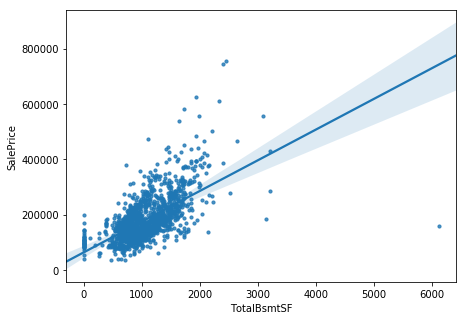

In [7]:
# Scatter plot with regression line
f, ax = plt.subplots(figsize=(7,5))
fig = sns.regplot(df_train["TotalBsmtSF"], df_train["SalePrice"], scatter_kws={'s':10})

Strong linear relationship, but X sometimes doesn't influence Y, such as when X=0

**OverallQual and SalePrice**

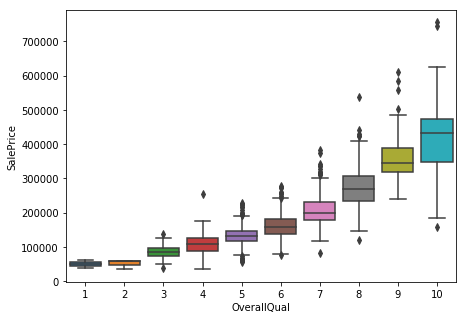

In [8]:
# Boxplot 
dataset = pd.concat([df_train["SalePrice"], df_train["OverallQual"]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=dataset)

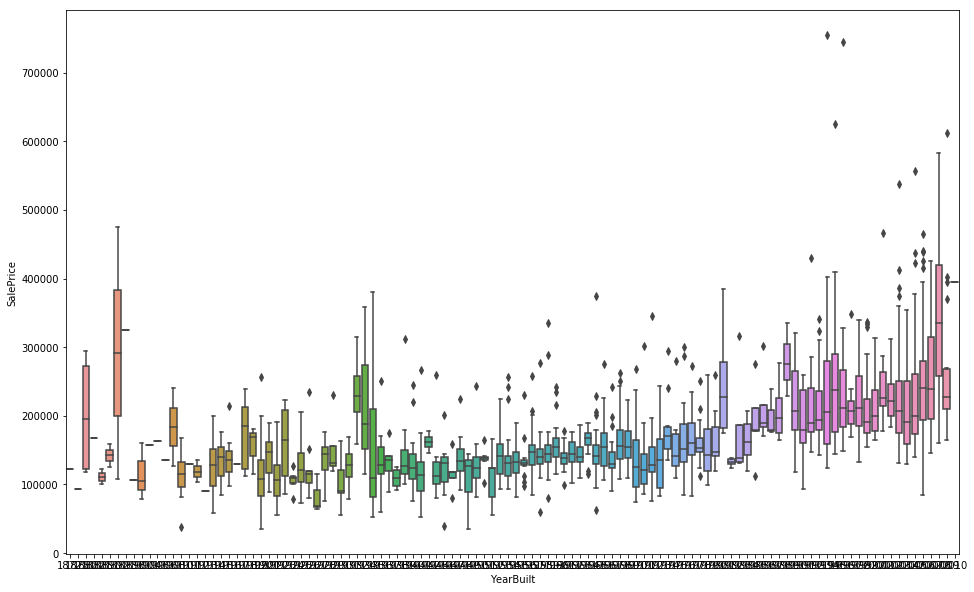

In [9]:
# Boxplot 
dataset2 = pd.concat([df_train["YearBuilt"], df_train["SalePrice"]], axis=1)
f,ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=dataset2)

**Summary:** *subjective points*
* 'GrLivArea'/'TotalBsmtSF' are linearly correlated with 'SalePrice' (postive correlated).
* For 'TotalBsmtSF' , the slope of linear relation are much stronger
* 'OverallQual' is also related to 'SalePrice' 
* It's hard to find a specific relation between 'YearBuilt' and 'SalePrice', but the 'SalePrice' is much higher in new houses comparing with the old one

## Multivariate study:

### Further analysis: in order to present *objective points*
* 'SalePrice' correlation matrix (heatmap style)
* Scatter plots between the most correlated variables

In [10]:
corrMatrix = df_train.corr() #Compute pairwise correlation of columns, excluding NA/null values
cols = corrMatrix.nlargest(10,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

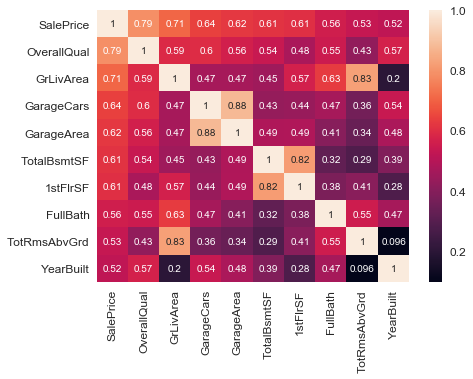

In [11]:
cm = np.corrcoef(df_train[cols].values.T) #Return Pearson product-moment correlation coefficients. .T:transpose
sns.set(font_scale=1.2)
f, ax = plt.subplots(figsize=(7,5))
hm = sns.heatmap(cm, cbar=True, annot=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

**Objective summary** by heat map:
* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
* 'GarageArea' and 'GarageCars' are similary in significantly correlated with 'SalePrice', while 'GarageCars' is** depend on **'GarageArea', which means they are highly related to each other with postive correlation. Thus, we should keep only one 'GarageCars', becasue it's **higher** than 'GarageArea'
* The same case occurs between 'TotalBsmtSF' and '1stFlrSF', we could only keep 'TotalBsmtSF'
* Similarly, 'GrLivArea' and 'TotalBsmtSF' are also** twin brothers**
* Some features are **multiconllinearity**, which says that these variables give same information

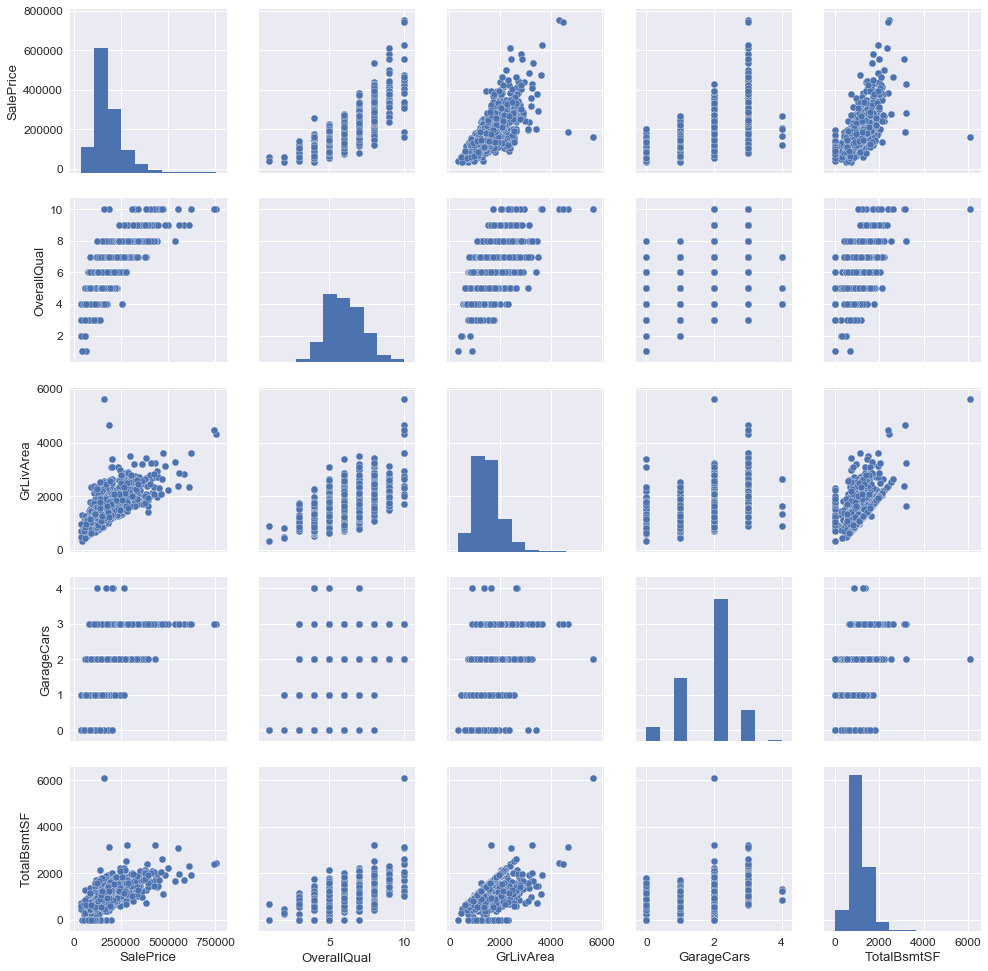

In [12]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
pp = sns.pairplot(df_train[cols], size = 2.75)

**Continue to former unsuare points:**

* 'TotalBsmtSF' is usually lower or equal to 'GrLivArea'. It's reasonable that people trend to get a larger above-ground living area, not a large basement

## Data cleaning:
### Missing data check:

In [13]:
total= df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data = missing_data[missing_data['Total'] != 0 ]
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' and 'LotFrontage' should be **droped** with **large portion** of missing data over 10%
* Imputing the rest features of missing_data:

*     **add** mean to numerical features
*     **add** mode to categorical features

In [14]:
# Delete features with MissingData percent over 10%
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.1]).index, axis=1)

In [15]:
df_train.shape

(1460, 75)

### Imputation

In [16]:
# Fill means in numerical missed columns; modes in categorical missed columns
def fill_missing_data(x):
    if x.dtype != "object":
        x = x.fillna(x.mean())
    else:
        x = x.fillna(x.mode()[0])
    return x

to_be_filled = missing_data[missing_data['Percent'] < 0.1].index

df_train[to_be_filled] = df_train[to_be_filled].apply(lambda x: fill_missing_data(x))

In [17]:
# Is null checking
df_train.isnull().any().any()

False

## Test assumption:
### **Assumption test for further multivariate analysis:** 
* Normality
* Homoscedasticity -- equal variance

**Normality**:  A normal distribution is essential for t-statistics and other statistics tests. Here we just check univariate nomarlity for 'SalePrice'. The multivariate normality is what we would like to have.  If we solve normality, we** avoid a lot of other problems** (heteroscedacity), so that's the main reason to do normality test.

**stats.normaltest(Series).pvalue** is a way to test normality:
* if p_value < 0.05, then we reject H0, not normal
* Else if p_value > 0.05, normal distribution

Here, we use histogram and normal probability plot to check normality

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


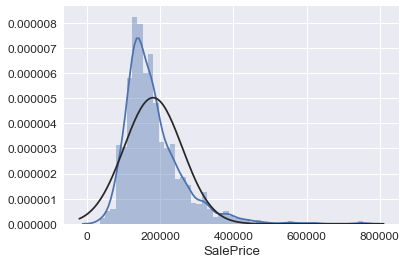

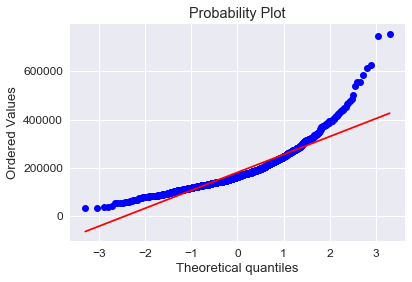

In [18]:
#Histogram and Normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

**Right skewed**, not normal distribution. In order to get a normal distribution, we can applied transformation by **log** function.

In [19]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


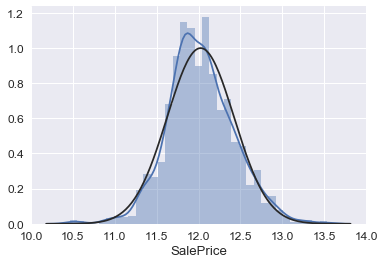

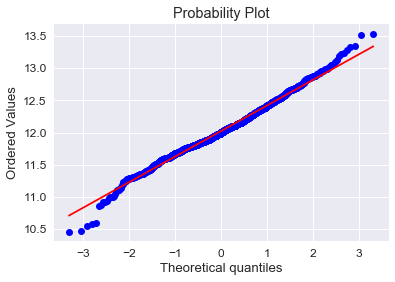

In [20]:
#Histogram and Normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'SalePrice' passes normality test. Same test applies on 'GrLivArea':

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


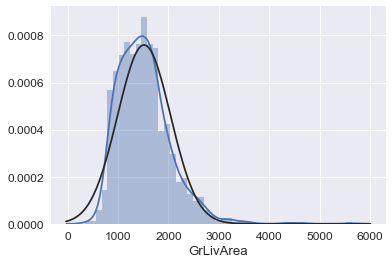

In [21]:
dist = sns.distplot(df_train['GrLivArea'], fit=norm)

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


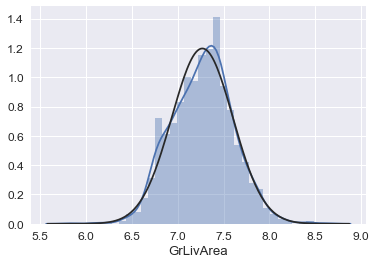

In [22]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
dist = sns.distplot(df_train['GrLivArea'], fit=norm)

Done! 'TotalBsmtSF' is next

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


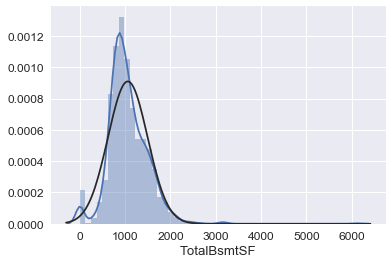

In [23]:
#histogram and normal probability plot
dis = sns.distplot(df_train['TotalBsmtSF'], fit=norm)

There is skewness and there are a lot of observations with value zero, which can not be transformed by log function. In order to apply log transformation, we can drop those disqualified observation, but we should mention that later statistics conslusion are only related to those houses without basement('TotalBsmtSF' = 0)

In [24]:
df_train['HasBsmt'] = pd.Series(df_train['TotalBsmtSF'], index = df_train.index)
df_train['HasBsmt'] = 0
# if TotalBsmtSF > 0, HasBsmt = 1; else HasBsmt = 0 
df_train['HasBsmt'] = np.where(df_train['TotalBsmtSF'] > 0, 1, 0)

In [25]:
# df_train[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
df_train['TotalBsmtSF'] = np.where(df_train['HasBsmt'] == 1, np.log(df_train['TotalBsmtSF']), 0)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


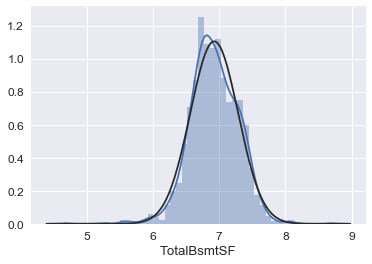

In [26]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm) #df_train[df_train['TotalBsmtSF']>0] is dataframe !!!

df_train = df_train[df_train['HasBsmt'] == 1]

'YearBuilt' can not be transformed as plot shown below:

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


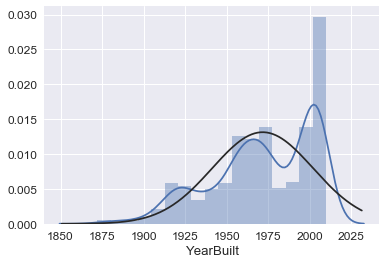

In [27]:
dis = sns.distplot(df_train['YearBuilt'], fit=norm)

* **Homoscedasticity** -- equal variance: 

LeveneResult(statistic=22.704592791393676, pvalue=1.984004278116756e-06)


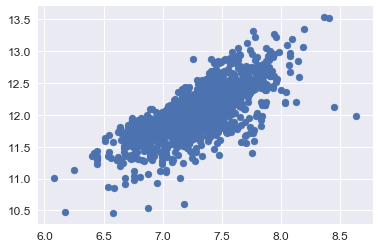

In [28]:
print(stats.levene(df_train['GrLivArea'], df_train['SalePrice']))
sc = plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

P-value is too small  << 0.05 , reject null hypothesis of equal variance, thus, they have different variances

LeveneResult(statistic=6.420399696277834, pvalue=0.0113349352524576)


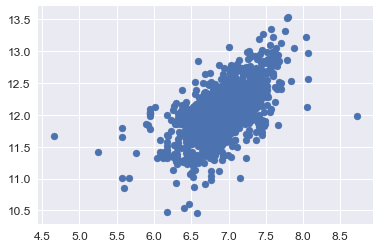

In [29]:
print(stats.levene(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']))
sc = plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

P-value is too small  << 0.05 , reject null hypothesis of equal variance, thus, they have different variances

## **Dummy variables**--**One_Hot Encoding**:
for every feature(catergory variable), if there are M prossible values, after One-Hot Encoding, there will be M binary features (eg, grade: 'good', 'medium', 'bad', after OHE, 
        
                      'grade_good'       'grade_medium'            'grade_bad'
       good     1                          0                           0
       medium   0                          1                           0
       bad      0                          0                           1      

Why One_Hot Encoding?
we call this as embedding the vector in the **Euclidean space** becasue many algorithms for **classification/regression/clustering** etc. requires computing distances between features or similarities between features. And many definitions of distances and similarities are defined over features in Euclidean space. 

**pros: 
easy for Classifier to process categroy features
increase the number of features**

In [30]:
df_train = pd.get_dummies(df_train)

81 features increase to 222 features